In [2]:
#import library yang dibutuhkan
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import numpy as np 
import os
import keras
from keras import backend as K
from keras.models import Sequential
from keras import layers
from keras.utils.np_utils import to_categorical
from skimage.io import imsave, imread
from skimage.transform import resize
print(tf.__version__)

2.7.0


In [3]:
# ekstrasi file zip datasets
import zipfile
local_zip = 'dataset.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/dataset')
zip_ref.close()

In [46]:
# membuat image generator (generate dataset untuk memperbanyak dataset)
dir = '/tmp/dataset'
train_datagen = ImageDataGenerator(
    rescale = 1./225,
    rotation_range = 10,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    fill_mode = 'nearest',
    validation_split=0.4) 

In [47]:
#generate data gambar ukuran 224 x 224

train_generator = train_datagen.flow_from_directory(
    dir,

    target_size =(224,224),
    batch_size =10,
    class_mode = 'categorical',
    shuffle = True,
    subset='training',

)

validation_generator = train_datagen.flow_from_directory(
    dir,
    target_size = (224,224),
    batch_size = 10,
    class_mode = 'categorical',
    shuffle = False,
    subset='validation',


)

Found 510 images belonging to 17 classes.
Found 340 images belonging to 17 classes.


In [48]:
#menambahkan penghitung ke setiap nama labels dan  mengurutkan list nama dari folder
print (train_generator.class_indices)
labels_txt = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f:
  f.write(labels_txt)

{'Dioda': 0, 'Dioda Foto': 1, 'Dioda LED': 2, 'Dioda Schottky': 3, 'Dioda Tunnel': 4, 'Dioda Varactor': 5, 'Dioda Zener': 6, 'Induktor Tetap': 7, 'Induktor Variabel': 8, 'Kapasitor Tetap': 9, 'Kapasitor Trimmer': 10, 'Kapasitor Varco': 11, 'Resistor LDR': 12, 'Resistor Potensiometer': 13, 'Resistor Rheostat': 14, 'Resistor Tetap': 15, 'Resistor Thermistor': 16}


In [49]:
#save label sebagai txt
!cat labels.txt

Dioda
Dioda Foto
Dioda LED
Dioda Schottky
Dioda Tunnel
Dioda Varactor
Dioda Zener
Induktor Tetap
Induktor Variabel
Kapasitor Tetap
Kapasitor Trimmer
Kapasitor Varco
Resistor LDR
Resistor Potensiometer
Resistor Rheostat
Resistor Tetap
Resistor Thermistor

In [53]:
#Arsitektur CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2), padding = 'valid'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation ='relu'),
    tf.keras.layers.Dense(17, activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_23 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 111, 111, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_24 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 54, 54, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 52, 52, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 26, 26, 64)      

In [54]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = tf.optimizers.Adam(),
              metrics=['accuracy'])

In [55]:
history = model.fit(
    train_generator,
    epochs = 100,
    validation_data = validation_generator,
    verbose =2
)

Epoch 1/100
51/51 - 16s - loss: 2.8546 - accuracy: 0.0471 - val_loss: 2.8332 - val_accuracy: 0.0588 - 16s/epoch - 308ms/step
Epoch 2/100
51/51 - 15s - loss: 2.8355 - accuracy: 0.0431 - val_loss: 2.8332 - val_accuracy: 0.0588 - 15s/epoch - 287ms/step
Epoch 3/100
51/51 - 15s - loss: 2.8338 - accuracy: 0.0314 - val_loss: 2.8331 - val_accuracy: 0.0676 - 15s/epoch - 286ms/step
Epoch 4/100
51/51 - 15s - loss: 2.8336 - accuracy: 0.0373 - val_loss: 2.8298 - val_accuracy: 0.0588 - 15s/epoch - 285ms/step
Epoch 5/100
51/51 - 16s - loss: 2.8178 - accuracy: 0.0569 - val_loss: 2.8094 - val_accuracy: 0.0706 - 16s/epoch - 308ms/step
Epoch 6/100
51/51 - 15s - loss: 2.8009 - accuracy: 0.0765 - val_loss: 2.8306 - val_accuracy: 0.0971 - 15s/epoch - 285ms/step
Epoch 7/100
51/51 - 15s - loss: 2.7480 - accuracy: 0.0941 - val_loss: 2.7501 - val_accuracy: 0.1088 - 15s/epoch - 285ms/step
Epoch 8/100
51/51 - 15s - loss: 2.6204 - accuracy: 0.1588 - val_loss: 2.4810 - val_accuracy: 0.2059 - 15s/epoch - 286ms/step


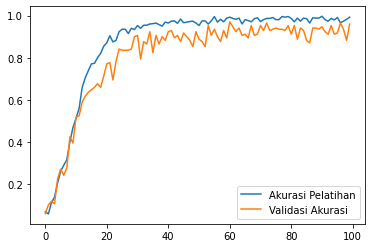

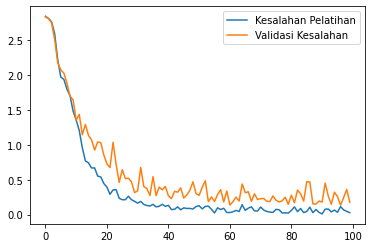

In [ ]:
# visualisasi data akurasi dan loss
import numpy as np 
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
plt.plot(history.history["accuracy"],label="Akurasi Pelatihan")
plt.plot(history.history["val_accuracy"],label="Validasi Akurasi")
plt.legend()
plt.show()

plt.plot(history.history["loss"],label="Kesalahan Pelatihan")
plt.plot(history.history["val_loss"],label="Validasi Kesalahan")
plt.legend()
plt.show()

In [ ]:
saved_model_dir = 'save/model'
tf.saved_model.save(model, saved_model_dir)

INFO:tensorflow:Assets written to: save/model/assets


In [ ]:
run_model = tf.function(lambda x : model(x))

# Save the concrete function.
concrete_func = run_model.get_concrete_function(
    tf.TensorSpec(model.inputs[0].shape, model.inputs[0].dtype)
)

In [ ]:
# Convert the model
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converted_tflite_model = converter.convert()
open('model_unquant2.tflite', "wb").write(converted_tflite_model)
# Convert the model to quantized version with post-training quantization
converter = tf.lite.TFLiteConverter.from_concrete_functions([concrete_func])
converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tflite_quant_model = converter.convert()
open('model2.tflite', "wb").write(tflite_quant_model)

1306000

In [ ]:
from keras.models import load_model
model = load_model('model.h5')
print(model)

In [ ]:
print(model.evaluate(x= X_test3, y = y_test3))

3/3 [==============================] - 10s 301ms/step - loss: 0.1462 - accuracy: 0.9398
[0.14624278247356415, 0.9397590160369873]
